In [1]:
%load_ext autoreload
%autoreload 2

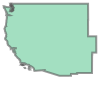

In [32]:
import pandas as pd
import numpy as np
from birdcall_distribution.geo import (
    get_shape_us_state,
    generate_grid,
    add_lonlat_columns,
    WESTERN_US_EXTENT,
)
from birdcall_distribution.plot import (
    dataframe_color_getter,
    plot_grid,
    plot_lonlat_points,
)
from functools import partial
import matplotlib.pyplot as plt
from shapely.ops import unary_union

# western continental US
states = [
    "Washington",
    "Oregon",
    "California",
    "Nevada",
    "Idaho",
    "Montana",
    "Wyoming",
    "Utah",
    "Colorado",
    "Arizona",
    "New Mexico",
]

# get the shape of the state
shapes = [get_shape_us_state(state).geometry for state in states]
# combine the shapes into a single shape
geometry = unary_union(shapes)
geometry

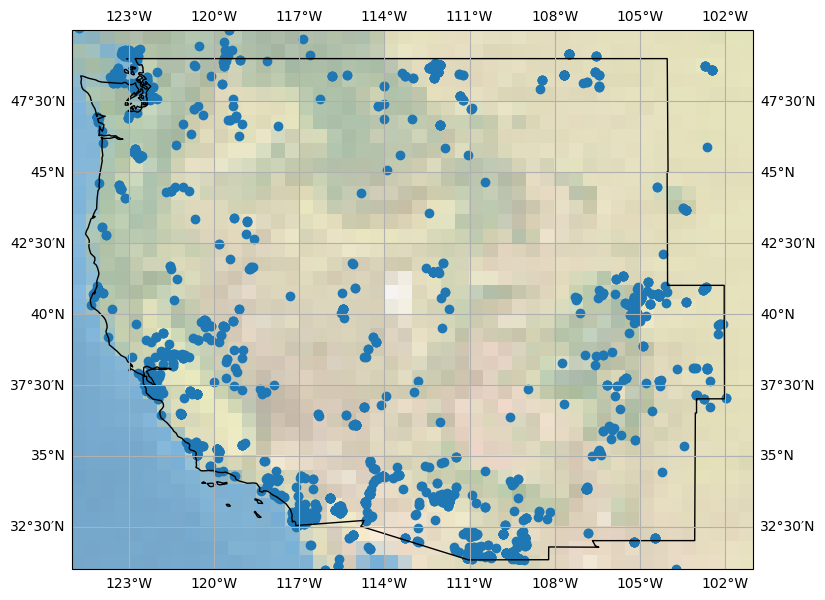

In [23]:
df = pd.read_csv("../data/raw/birdclef-2022/train_metadata.csv")
df = df[["primary_label", "latitude", "longitude"]].dropna()
plot_lonlat_points(geometry, WESTERN_US_EXTENT, df)

Number of grid cells: 96


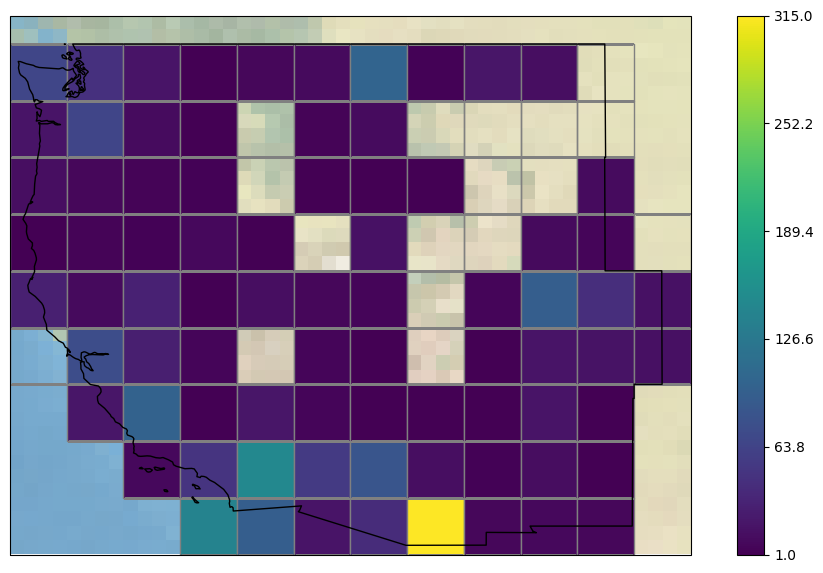

In [34]:
grid = generate_grid(geometry, WESTERN_US_EXTENT, (2, 2))
# print number of grid cells
print("Number of grid cells:", len(grid))
grid_df = add_lonlat_columns(df, grid)
grid_df = grid_df[grid_df.grid.notnull()]

counts_df = pd.DataFrame(grid_df.grid_id.value_counts().reset_index())
counts_df.columns = ["grid_id", "observations"]
# log observation
counts_df["log_observations"] = counts_df.observations.apply(np.log)

prop = "observations"
kwargs = dict(
    color_callback=partial(dataframe_color_getter, counts_df, "grid_id", prop),
    vmin=counts_df[prop].min(),
    vmax=counts_df[prop].max(),
    draw_gridline=False,
)
plot_grid(geometry, WESTERN_US_EXTENT, grid, **kwargs)